
# EDA · Saber Pro 2022 — Universidad Mariana · Ingeniería de Sistemas (SNIES 2445)

Este cuaderno realiza un **Análisis Exploratorio de Datos (EDA)** profesional sobre los microdatos de **Saber Pro 2022**, con enfoque exclusivo en los estudiantes de **Universidad Mariana** matriculados en **Ingeniería de Sistemas** (código **SNIES 2445**).

**Objetivo dentro del TFM:** generar la **línea de salida** (desempeño al egreso) que luego se cruzará con la **línea de entrada** (Saber 11) para estimar **Valor Agregado (VA)** y **Contribución Relativa (CR)** del programa.


In [1]:

import os
import unicodedata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog

plt.rcParams.update({
    "figure.figsize": (9, 5),
    "axes.grid": True
})

print("Librerías cargadas correctamente")

Librerías cargadas correctamente



## 1) Selección del archivo de datos

En lugar de fijar un nombre, se abrirá un cuadro de diálogo para seleccionar el archivo TXT de Saber Pro 2020.  
Así evitamos errores de "archivo no encontrado".


In [2]:

# Ruta fija del archivo Saber Pro 2020
file_path = "Examen_Saber_Pro_Genericas_2022.txt"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"No se encontró el archivo en la ruta: {file_path}")

print("Archivo seleccionado:", file_path)

# Columnas de interés
COLS = [
    "estu_inst_departamento","inst_nombre_institucion","inst_cod_institucion","inst_origen","inst_caracter_academico",
    "estu_prgm_academico","estu_snies_prgmacademico","estu_nivel_prgm_academico",
    "estu_depto_presentacion","estu_mcpio_presentacion","estu_zona_presentacion",
    "estu_genero","fami_estratovivienda",
    "estu_horassemanatrabaja","estu_pagomatriculabeca","estu_pagomatriculacredito",
    "estu_pagomatriculapadres","estu_pagomatriculapropio",
    "mod_lectura_critica_punt","mod_razona_cuantitat_punt","mod_comuni_escrita_punt",
    "mod_ingles_punt","mod_competen_ciudada_punt","punt_global","percentil_global",
]

# Lectura del archivo
df = pd.read_csv(file_path, sep=";", encoding="latin1", low_memory=False)
keep = [c for c in COLS if c in df.columns]
df = df[keep].copy()

print("Dimensiones iniciales:", df.shape)
df.head(3)


Archivo seleccionado: Examen_Saber_Pro_Genericas_2022.txt
Dimensiones iniciales: (231030, 24)


,estu_inst_departamento,inst_nombre_institucion,inst_cod_institucion,inst_origen,inst_caracter_academico,estu_prgm_academico,estu_snies_prgmacademico,estu_nivel_prgm_academico,estu_depto_presentacion,estu_mcpio_presentacion,...,estu_pagomatriculacredito,estu_pagomatriculapadres,estu_pagomatriculapropio,mod_lectura_critica_punt,mod_razona_cuantitat_punt,mod_comuni_escrita_punt,mod_ingles_punt,mod_competen_ciudada_punt,punt_global,percentil_global
0,ANTIOQUIA,UNIVERSIDAD EAFIT--MEDELLIN,1712.0,NO OFICIAL - FUNDACIÃN,UNIVERSIDAD,DERECHO,7227.0,UNIVERSITARIO,BOGOTÃ,BOGOTÃ D.C.,...,Si,No,No,222,173,159,198.0,191,189.0,96.0
1,BOGOTÃ,UNIVERSIDAD EAN-BOGOTÃ D.C.,2812.0,NO OFICIAL - CORPORACIÃN,UNIVERSIDAD,NEGOCIOS INTERNACIONALES,52983.0,UNIVERSITARIO,BOGOTÃ,BOGOTÃ D.C.,...,No,No,Si,156,169,173,153.0,182,167.0,81.0
2,SANTANDER,UNIVERSIDAD INDUSTRIAL DE SANTANDER-BUCARAMANGA,1204.0,OFICIAL DEPARTAMENTAL,UNIVERSIDAD,INGENIERIA ELECTRICA,699.0,UNIVERSITARIO,BOGOTÃ,BOGOTÃ D.C.,...,Si,No,No,227,227,0,300.0,300,211.0,100.0



## 2) Limpieza y normalización

- Conversión de puntajes a numéricos.  
- Normalización de textos (mayúsculas, sin tildes).  
- Eliminación de duplicados.


In [3]:

# 2.1 Conversión de puntajes
score_cols = ["mod_lectura_critica_punt","mod_razona_cuantitat_punt","mod_comuni_escrita_punt",
              "mod_ingles_punt","mod_competen_ciudada_punt","punt_global","percentil_global"]
for c in score_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# 2.2 Normalización de texto
def norm_text(s: pd.Series) -> pd.Series:
    s = s.astype(str).str.replace("\xa0"," ", regex=False).str.strip()
    s = s.apply(lambda x: "".join(ch for ch in unicodedata.normalize("NFKD", x) if not unicodedata.combining(ch)))
    return s.str.upper()

for c in ["inst_nombre_institucion","estu_prgm_academico","inst_origen",
          "inst_caracter_academico","estu_genero","fami_estratovivienda","estu_inst_departamento",]:
    if c in df.columns:
        df[c] = norm_text(df[c])

# 2.3 Duplicados
before = len(df)
df = df.drop_duplicates()
print("Duplicados eliminados:", before - len(df))
df.info()

Duplicados eliminados: 28
<class 'pandas.core.frame.DataFrame'>
Index: 231002 entries, 0 to 231029
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   estu_inst_departamento     231002 non-null  object 
 1   inst_nombre_institucion    231002 non-null  object 
 2   inst_cod_institucion       224624 non-null  float64
 3   inst_origen                231002 non-null  object 
 4   inst_caracter_academico    231002 non-null  object 
 5   estu_prgm_academico        231002 non-null  object 
 6   estu_snies_prgmacademico   224622 non-null  float64
 7   estu_nivel_prgm_academico  224623 non-null  object 
 8   estu_depto_presentacion    231001 non-null  object 
 9   estu_mcpio_presentacion    231001 non-null  object 
 10  estu_genero                231002 non-null  object 
 11  fami_estratovivienda       231002 non-null  object 
 12  estu_horassemanatrabaja    219249 non-null  object 
 13  estu_pag


## 3) Filtro del universo de análisis

Se seleccionan únicamente estudiantes de **Universidad Mariana** y del programa **Ingeniería de Sistemas (SNIES 2445)**.


In [4]:

# Filtro por SNIES si está disponible
mask_snies = False
if "estu_snies_prgmacademico" in df.columns:
    mask_snies = df["estu_snies_prgmacademico"].astype(str).str.strip() == "2445"

# Filtro por nombre (respaldo)
inst_ok = df.get("inst_nombre_institucion", pd.Series(dtype=str)).str.contains("UNIVERSIDAD MARIANA", na=False)
prog_ok = df.get("estu_prgm_academico", pd.Series(dtype=str)).str.contains("INGENIER", na=False) &           df.get("estu_prgm_academico", pd.Series(dtype=str)).str.contains("SISTEM", na=False)

if isinstance(mask_snies, pd.Series) and mask_snies.any():
    df_mariana = df[mask_snies].copy()
else:
    df_mariana = df[inst_ok & prog_ok].copy()

print("Filas tras filtro (Mariana · Ing. Sistemas):", df_mariana.shape)
df_mariana.head(3)

Filas tras filtro (Mariana · Ing. Sistemas): (28, 24)


,estu_inst_departamento,inst_nombre_institucion,inst_cod_institucion,inst_origen,inst_caracter_academico,estu_prgm_academico,estu_snies_prgmacademico,estu_nivel_prgm_academico,estu_depto_presentacion,estu_mcpio_presentacion,...,estu_pagomatriculacredito,estu_pagomatriculapadres,estu_pagomatriculapropio,mod_lectura_critica_punt,mod_razona_cuantitat_punt,mod_comuni_escrita_punt,mod_ingles_punt,mod_competen_ciudada_punt,punt_global,percentil_global
103890,NARIAO,UNIVERSIDAD MARIANA-PASTO,1720.0,NO OFICIAL - FUNDACIAN,UNIVERSIDAD,INGENIERIA DE SISTEMAS,2445.0,UNIVERSITARIO,BOGOTÃ,BOGOTÃ D.C.,...,No,Si,Si,156,154,137,174.0,156,155.0,65.0
116366,NARIAO,UNIVERSIDAD MARIANA-PASTO,1720.0,NO OFICIAL - FUNDACIAN,UNIVERSIDAD,INGENIERIA DE SISTEMAS,2445.0,UNIVERSITARIO,BOGOTÃ,BOGOTÃ D.C.,...,No,Si,No,166,196,184,188.0,178,182.0,92.0
117826,NARIAO,UNIVERSIDAD MARIANA-PASTO,1720.0,NO OFICIAL - FUNDACIAN,UNIVERSIDAD,INGENIERIA DE SISTEMAS,2445.0,UNIVERSITARIO,BOGOTÃ,BOGOTÃ D.C.,...,Si,Si,Si,124,101,165,162.0,139,138.0,40.0



## 4) Chequeos de calidad de puntajes


In [5]:

# Nulos
nulls = df_mariana[score_cols].isna().mean().sort_values(ascending=False).to_frame("pct_null")
display((nulls*100).round(2))

# Rango de puntajes
rng = pd.DataFrame({"min": df_mariana[score_cols].min(), "max": df_mariana[score_cols].max()})
display(rng)

,pct_null
mod_lectura_critica_punt,0.0
mod_razona_cuantitat_punt,0.0
mod_comuni_escrita_punt,0.0
mod_ingles_punt,0.0
mod_competen_ciudada_punt,0.0
punt_global,0.0
percentil_global,0.0


,min,max
mod_lectura_critica_punt,89.0,196.0
mod_razona_cuantitat_punt,94.0,199.0
mod_comuni_escrita_punt,0.0,300.0
mod_ingles_punt,115.0,221.0
mod_competen_ciudada_punt,80.0,181.0
punt_global,89.0,192.0
percentil_global,2.0,97.0



## 5) Estadísticos descriptivos


In [6]:

desc = df_mariana[score_cols].describe().T
display(desc)

,count,mean,std,min,25%,50%,75%,max
mod_lectura_critica_punt,28.0,139.464286,23.733836,89.0,124.75,142.5,154.50,196.0
mod_razona_cuantitat_punt,28.0,147.714286,28.401692,94.0,129.50,149.5,168.00,199.0
mod_comuni_escrita_punt,28.0,156.642857,80.089864,0.0,122.50,152.0,186.25,300.0
mod_ingles_punt,28.0,156.678571,22.154430,115.0,141.50,160.0,168.25,221.0
mod_competen_ciudada_punt,28.0,137.142857,29.404855,80.0,122.50,139.5,154.50,181.0
punt_global,28.0,147.357143,25.604129,89.0,133.50,149.0,161.25,192.0
percentil_global,28.0,53.000000,28.339215,2.0,33.25,55.5,72.50,97.0



## 6) Perfil sociodemográfico y formas de financiación


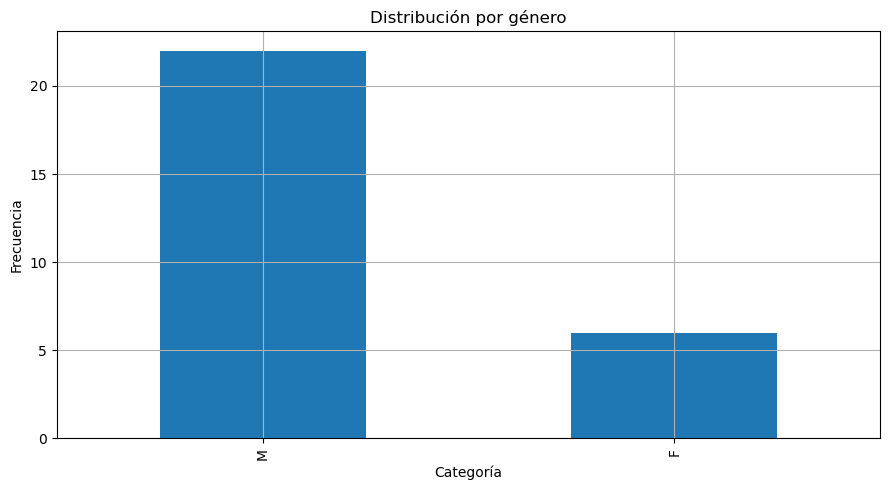

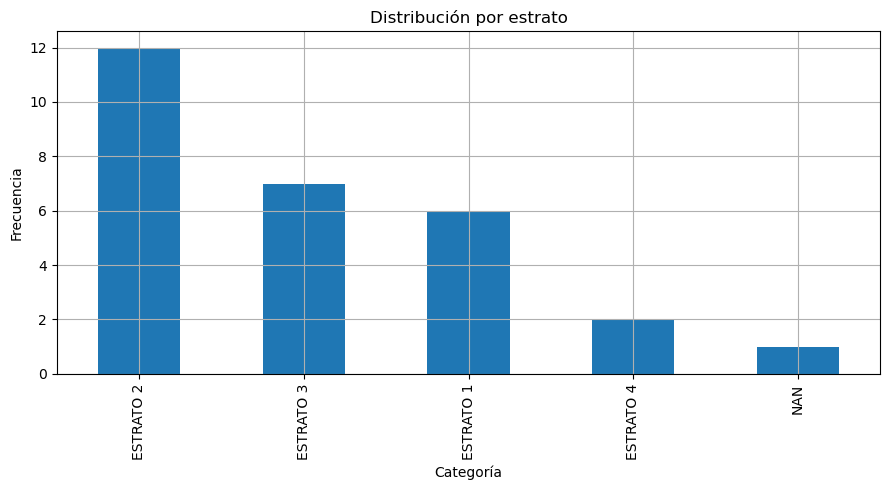

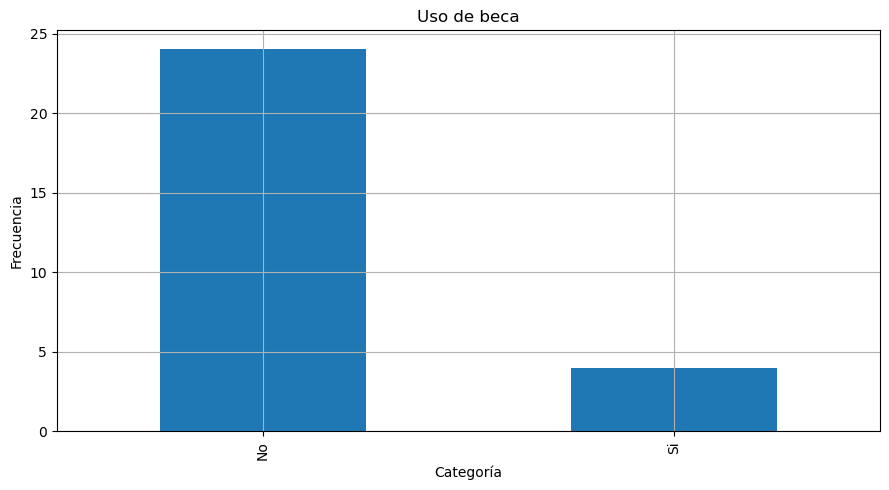

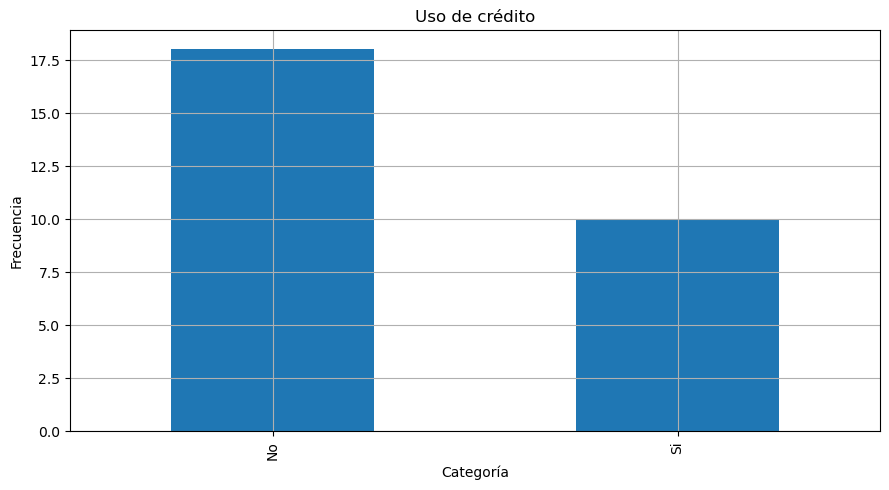

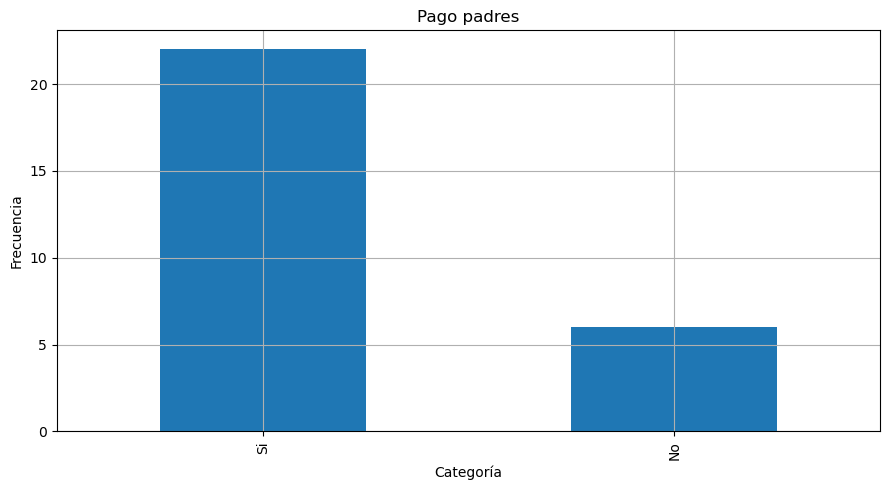

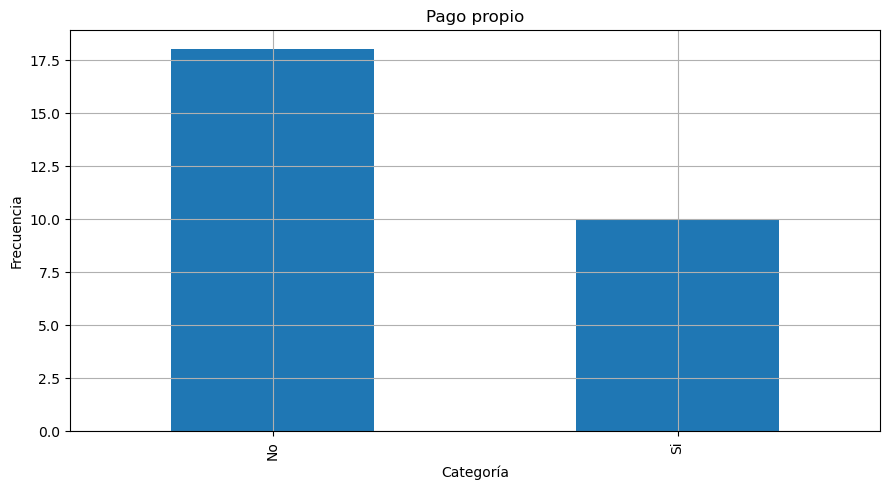

In [7]:

def plot_bar_counts(series, title):
    vc = series.value_counts(dropna=False)
    plt.figure()
    vc.plot(kind="bar")
    plt.title(title)
    plt.xlabel("Categoría")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

if "estu_genero" in df_mariana.columns:
    plot_bar_counts(df_mariana["estu_genero"], "Distribución por género")

if "fami_estratovivienda" in df_mariana.columns:
    plot_bar_counts(df_mariana["fami_estratovivienda"], "Distribución por estrato")

for paycol, title in [("estu_pagomatriculabeca","Uso de beca"),
                      ("estu_pagomatriculacredito","Uso de crédito"),
                      ("estu_pagomatriculapadres","Pago padres"),
                      ("estu_pagomatriculapropio","Pago propio")]:
    if paycol in df_mariana.columns:
        plot_bar_counts(df_mariana[paycol], f"{title}")

### Resultados — Año 2022

En la distribución por género, se observa nuevamente una predominancia del masculino frente al femenino, aunque con ligeras variaciones respecto al año anterior. Esto indica que la brecha de género se mantiene en la cohorte, con una mayoría de estudiantes hombres en comparación con mujeres.

En cuanto a la distribución por estrato, el estrato 2 continúa siendo el más representativo, seguido por el estrato 3 y el estrato 1. La presencia del estrato 4 sigue siendo reducida, lo cual confirma que la mayor parte de los estudiantes proviene de contextos socioeconómicos bajos y medios-bajos. Al igual que en el año anterior, se presentan algunos registros faltantes o no clasificados.

El uso de beca sigue siendo minoritario, con un número reducido de estudiantes beneficiados frente a una mayoría que no accede a este tipo de apoyo. Esto sugiere que las becas aún no constituyen un mecanismo relevante de financiamiento dentro de la población estudiada.

Respecto al uso de crédito, los resultados muestran que, aunque una parte de los estudiantes recurre a este mecanismo, la mayoría sigue optando por no hacerlo. Esto evidencia que el crédito continúa funcionando como una alternativa complementaria, pero no como la principal fuente de financiamiento.

En relación con las formas de pago, los datos confirman que los padres siguen siendo los principales financiadores de los estudios, dado que la mayoría de estudiantes indica que el pago es asumido por ellos. En contraste, el pago propio tiene menor peso, aunque se mantiene una proporción de estudiantes que sí costean sus estudios con recursos personales.

En síntesis, los resultados del año 2022 reafirman las tendencias observadas en 2021: predominio masculino en la matrícula, concentración en estratos socioeconómicos bajos (principalmente estrato 2), escasa participación en programas de becas, uso limitado del crédito educativo y un fuerte protagonismo de los padres como principales responsables del financiamiento. Estas características refuerzan la idea de una población estudiantil con condiciones socioeconómicas limitadas y una alta dependencia del núcleo familiar para el sostenimiento de la educación superior.



## 7) Distribución de puntajes


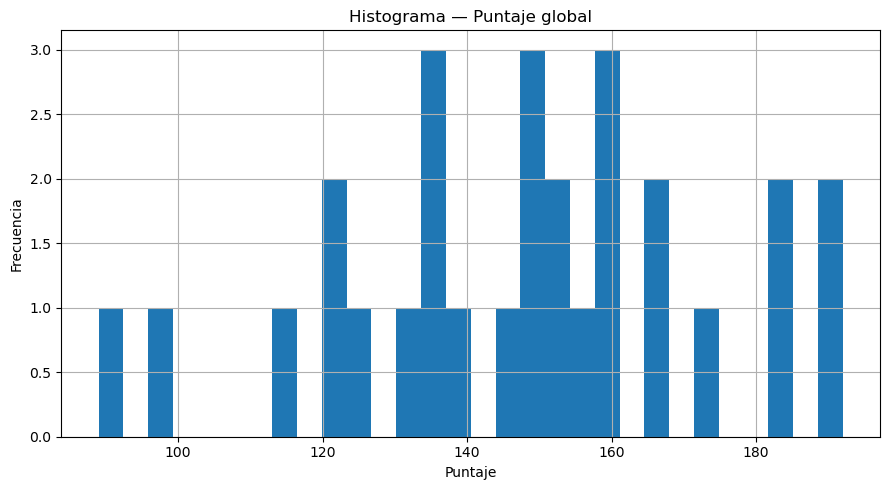

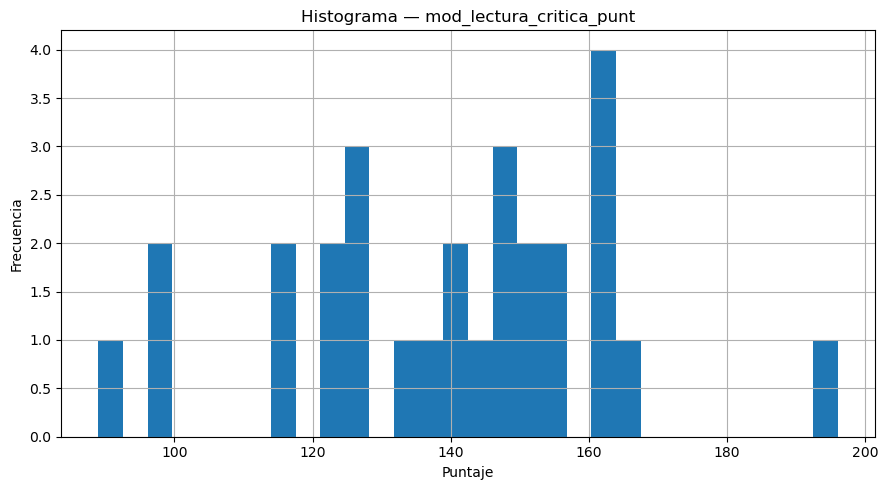

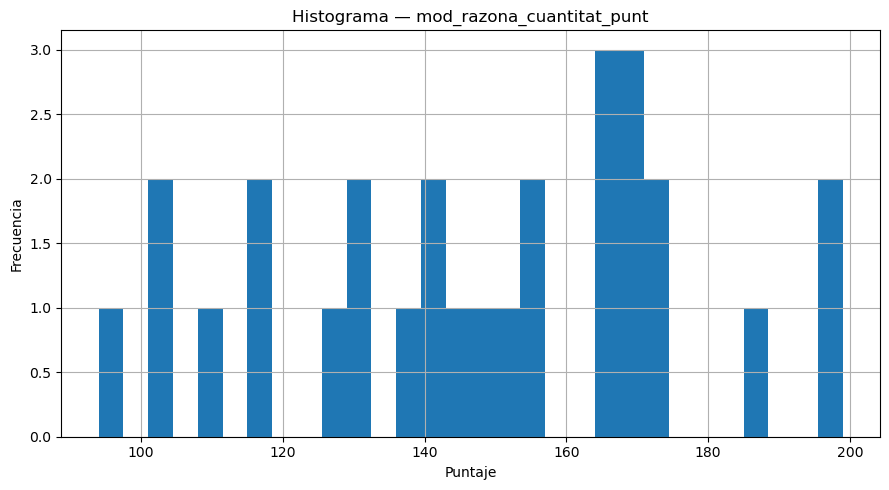

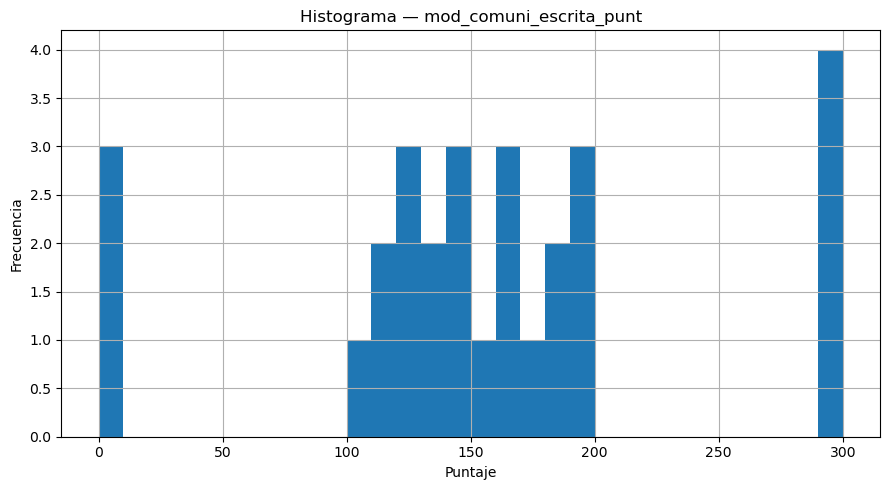

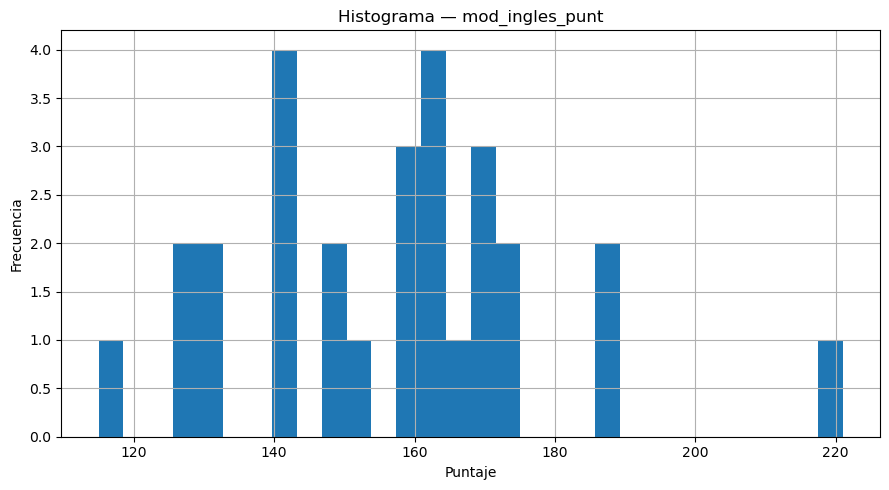

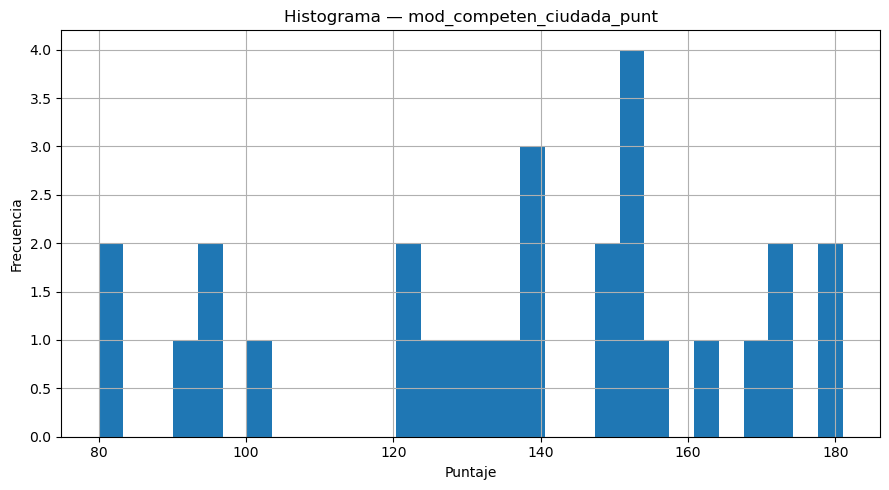

In [8]:

def hist_score(df_, col, title):
    if col in df_.columns and df_[col].notna().any():
        plt.figure()
        df_[col].dropna().plot(kind="hist", bins=30)
        plt.title(title)
        plt.xlabel("Puntaje")
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()

hist_score(df_mariana, "punt_global", "Histograma — Puntaje global")
for c in ["mod_lectura_critica_punt","mod_razona_cuantitat_punt","mod_comuni_escrita_punt",
          "mod_ingles_punt","mod_competen_ciudada_punt"]:
    hist_score(df_mariana, c, f"Histograma — {c}")

### Resultados — Histogramas de puntajes (Año 2022)

El análisis del puntaje global muestra que la mayoría de los estudiantes se concentran entre los **130 y 170 puntos**, con picos alrededor de los 150-160. Esto refleja un desempeño predominantemente medio, aunque existen valores bajos cercanos a 90 y otros más altos por encima de 180, lo que evidencia cierta dispersión en los resultados.

En el módulo de **lectura crítica**, los puntajes se concentran principalmente entre 120 y 160, con un pico notable en torno a los 160 puntos. Aunque la mayoría se agrupa en un rango medio, también se presentan casos más bajos (90-100) y algunos valores aislados más altos cercanos a 190, lo que sugiere diferencias marcadas en la comprensión lectora.

En cuanto a **razonamiento cuantitativo**, los resultados se distribuyen de forma amplia, con mayor concentración entre 130 y 170 puntos y picos en torno a 160. Se observan algunos desempeños bajos (90-100) y otros más altos (cercanos a 200), reflejando heterogeneidad en las habilidades matemáticas de la cohorte.

La **comunicación escrita** presenta una distribución muy dispersa: mientras la mayoría se ubica entre 110 y 180 puntos, existen casos extremos que alcanzan valores cercanos a 0 y otros alrededor de 300. Esta alta variabilidad indica que las competencias escritas son un área con desigualdades notables entre los estudiantes.

En la prueba de **inglés**, los puntajes tienden a concentrarse entre 140 y 170, con un pico claro en torno a los 160 puntos. Aunque la distribución es más homogénea que en otras áreas, también aparecen valores atípicos que superan los 200, lo que evidencia que un pequeño grupo logra desempeños destacados.

Finalmente, en **competencias ciudadanas**, la distribución se ubica mayoritariamente entre 130 y 160 puntos, con frecuencias más altas alrededor de los 150. Al igual que en otros módulos, se observan valores bajos cercanos a 80 y otros que superan los 180, lo que refleja diversidad en los niveles de desempeño.

En conjunto, los histogramas del año 2022 muestran que los estudiantes se concentran en rangos medios de puntaje en la mayoría de las áreas, con presencia de valores extremos más notorios en **comunicación escrita**. Esto sugiere que, aunque hay una base común de desempeño medio, existen desigualdades importantes en ciertas competencias específicas.



## 8) Exportación de datos limpios


In [ ]:
from pathlib import Path

# Carpeta de salida
out_dir = Path(r"C:\Temp\spro_2020_tfm_outputs")
out_dir.mkdir(parents=True, exist_ok=True)

# Archivo destino
out_file = out_dir / "spro_mariana_sistemas_2020.csv"

# Guardar df_mariana directamente
df_mariana.to_csv(str(out_file), index=False, encoding="utf-8-sig")
print("✅ Guardado:", out_file)


✅ Guardado: C:\Temp\spro_2020_tfm_outputs\spro_mariana_sistemas_2020.csv


In [10]:
import re, unicodedata
import pandas as pd
from pathlib import Path

# --- helpers de limpieza robusta ---
def fix_mojibake(s):
    """Intenta corregir texto corrupto (utf8/latin1)."""
    if pd.isna(s): 
        return s
    s = str(s)
    # intento 1: típico latin1->utf8
    try:
        return s.encode('latin1').decode('utf-8')
    except Exception:
        pass
    return s

def deaccent_upper(s):
    if pd.isna(s): return s
    s = str(s).upper().strip()
    # quita diacríticos
    s = ''.join(c for c in unicodedata.normalize('NFD', s) 
                if unicodedata.category(c) != 'Mn')
    # colapsa espacios
    s = ' '.join(s.split())
    return s

def clean_depto(s):
    """Normaliza departamento; repara variantes de NARIÑO."""
    if pd.isna(s): return s
    s0 = fix_mojibake(s)
    s1 = deaccent_upper(s0)  # NARIÑO -> NARINO
    # repara casos 'NARIA?O' (carácter raro entre A y O)
    if re.fullmatch(r'NARIA\W?O', s1):
        return 'NARINO'
    # algunos datasets dejan basura no ASCII; homologa
    if s1 in {'NARINO','NARIN0','NARINÓ','NARINÒ','NARIÑO'}:
        return 'NARINO'
    return s1

# --- aplica limpieza a tu dataframe de SPro ---
col_depto = 'estu_inst_departamento'  # ajústalo si tu col cambia
df[col_depto + '_clean'] = df[col_depto].map(clean_depto)

print("Únicos antes:", df[col_depto].dropna().astype(str).str.upper().unique()[:10])
print("Únicos después:", df[col_depto + '_clean'].dropna().unique()[:10])

# --- filtra todos los de Nariño ---
mask_narino = df[col_depto + '_clean'].eq('NARINO')
df_narino = df.loc[mask_narino].copy()
print("Filas Nariño:", len(df_narino))


out_dir = Path(r"C:\Temp\spro_2020_tfm_outputs")
out_dir.mkdir(parents=True, exist_ok=True)

# 1) TODOS Nariño
out_file_nar = out_dir / "spro_narino_2022.csv"
df_narino.to_csv(str(out_file_nar), index=False, encoding="utf-8-sig")
print("✅ Guardado Nariño:", out_file_nar)



Únicos antes: ['ANTIOQUIA' 'BOGOTA\x81' 'SANTANDER' 'ATLANTICO' 'NORTE SANTANDER'
 'VALLE' 'QUINDIO' 'HUILA' 'BOLIVAR' 'NAN']
Únicos después: ['ANTIOQUIA' 'BOGOTA\x81' 'SANTANDER' 'ATLANTICO' 'NORTE SANTANDER'
 'VALLE' 'QUINDIO' 'HUILA' 'BOLIVAR' 'NAN']
Filas Nariño: 3912
✅ Guardado Nariño: C:\Temp\spro_2020_tfm_outputs\spro_narino_2022.csv



### Conexión con VA/CR
Este dataset representa la **línea de salida** del programa. Al cruzarlo con Saber 11 (línea de entrada), se calcularán el **Valor Agregado** y la **Contribución Relativa**, controlando por variables sociodemográficas y académicas.
